## Visualizing complex-valued functions with Matplotlib and Mayavi

The study of complex-valued functions is a difficult chapter of mathematics for most  students.
Usually textbooks  do not show up any figure to visualize in some way such functions.

When studying   real functions of one or two variables, an intuitive grasp of some   properties one acquires looking at their graphs.
Unlike  real functions of one or two variables,  whose graphs are curves  in  $\mathbb{R}^2$, respectively
         surfaces in $\mathbb{R}^3$, the graph of a complex function, $f:\mathbb{C}\to\mathbb{C}$, lies in $\mathbb{R}^4$. 
Visualization in four dimensions is a difficult task and the method employed depends on the "geometry" of the object to be visualized.

Fortunately, the development of cylindrical color models, such as [HSL and HSV](http://en.wikipedia.org/wiki/HSL_and_HSV), and the possibility to express the values $f(z)$ of a complex function in polar coordinates, $f(z)=|f(z)|\exp(i \arg(f(z))$, led to the design of a fruitful technique of visualization  of the values of a complex function through a color-coding method. This method is called domain coloring. 

A list of references dedicated to  visualization of complex functions, as well as of the software implementations of different methods of visualization can be found in [Notices of AMS](http://www.ams.org/notices/201106/rtx110600768p.pdf) and on  [Hans Lundmark's complex analysis pages](http://www.mai.liu.se/~halun/complex/).





In order to understand the basic idea behind domain coloring we describe the RGB and HSV color model.

###  RGB and  HSV color model

The RGB (Red, Green, Blue) is the basic color space. Its geometrical model is the unit cube. Each color is represented as a triple $(r,g,b)$ of real numbers in $[0,1]$,  where $r,g,b $ are  quantities 
of the primary colors (red, green and blue) contained by that color. 



In [2]:
from IPython.display import Image
Image(url='http://www.blackice.com/images/RGB_Cube.jpg')

Computers treat colors in RGB format. However in applications it is much more appropriate to use the HSV  color model, because colors in this space are specified in the same way the humans perceive the color, namely giving the hue, saturation and brightness.


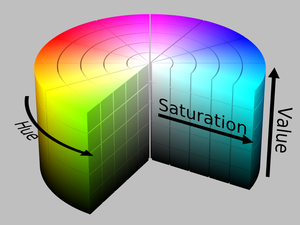

In [3]:
Image(filename='Imags/HSV.png')# a resized image of this one
         #http://en.wikipedia.org/wiki/File:HSV_color_solid_cylinder_alpha_lowgamma.png

The  HSV model is represented by a solid cylinder having the radius $1$, and height 1. $H$ is the hue, $S$, saturation, and $V$ represents  the brightness.

Sectioning this cylinder with a plane perpendicular to its vertical axis, at the height  $V=v$, one gets a color wheel whose complex parameterization is
 $z=Se^{2\pi i H}$.

As hue $h$ varies from 0 to 1, the corresponding colors vary in this color wheel such that  at $2\pi h$, with $h\in\{0, 1/6, 1/3, 1/2, 2/3, 5/6, 1\}$ are located respectively the colors  red,  yellow,  green, cyan, blue,  magenta, and red again (see the next image).

Saturation represents  the purity of  colors. For $S=1$ all colors are pure (do not contain white). As $S$ decreases the colors look more fade.

The brightness increases from zero to 1. At $V=0$, all colours look dark.


The images below illustrate  the  color wheels  of   brightness $V=1$, respectively $V=0.5$.


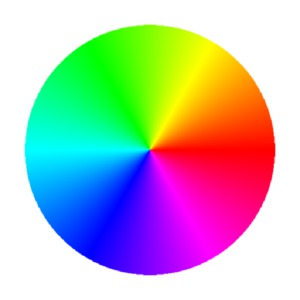

In [4]:

Image(filename='Imags/ColorWheelV1.jpg') 

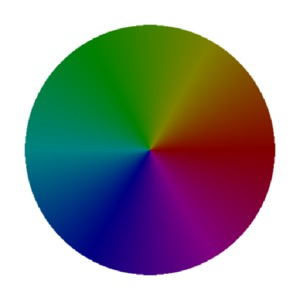

In [5]:
Image(filename='Imags/ColorWheelV05.jpg')

These color wheels  are generated using [Asymptote](http://asymptote.sourceforge.net/). The asy  code `colorwheel.asy` is saved
in the folder [Math](https://github.com/empet/Math/) . 
Asymptote can be called within IPython Notebook (see details [here](https://github.com/jrjohansson/ipython-asymptote))
but it requires supplemental settings, such as installing [dvisvgm](http://dvisvgm.sourceforge.net/) and more.

Most of the plots in this IPython Notebook will be generated using `matplotlib` and  embedded inline:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb
rcdef = plt.rcParams.copy()

Let us  get new insights into the HSV model. 

In order to see how  the brightness of colors varies in a cylindrical surface of constant saturation, we generate the colors
in a rectangle obtained by cutting that cylindrical surface along the generatrice of angular coordinate, $H=0$:

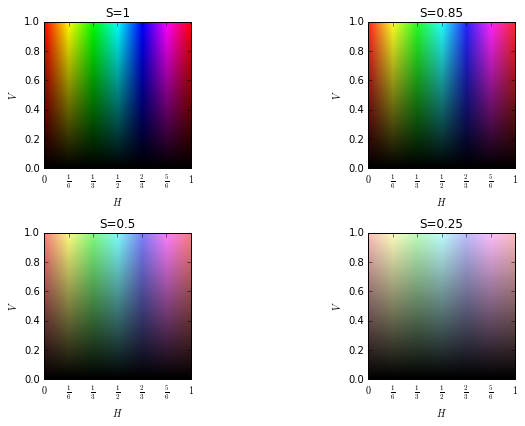

In [2]:
plt.rcParams['figure.figsize'] = 10, 6
sat=[1.0, 0.85, 0.5, 0.25]
svals=['S=1', 'S=0.85', 'S=0.5', 'S=0.25']
for k, s in zip(range(4),sat):
    V,H = np.mgrid[0:1:200j, 0:1:200j]
    S = s*np.ones_like(H)  
    HSV = np.dstack((H,S,V))
    RGB = hsv_to_rgb(HSV)
    plt.subplot(2,2,k+1)
    plt.imshow(RGB, origin="lower", extent=[0, 1, 0, 1])
    plt.xticks([0, 1.0/6, 1.0/3, 1.0/2,  2.0/3, 5.0/6, 1],
    ['$0$', r'$\frac{1}{6}$', r'$\frac{1}{3}$', r'$\frac{1}{2}$', r'$\frac{2}{3}$',
     r'$\frac{5}{6}$', '$1$'])
    plt.xlabel("$H$")
    plt.ylabel("$V$")
    plt.title(svals[k])
plt.tight_layout(1)    

These images suggest that the points of a subset  $D$ of the complex plane can be  encoded
by the colors in a rectangle  of constant saturation, $S=s_0\in[0,1]$. Namely, to each $z\in D$ one associates the triple $(h, s_0, v)$ in the HSV cylinder, where  $h=((\arg(z)/2\pi+1) \:\mbox{modulo}\:1$, and $v=g(|z|)$.  

$\arg(z)\in(-\pi, \pi]$ is the principal argument of $z$,   and
$g:[0,\infty)\to[0,1)$ is a strictly increasing function, chosen such that to be  rapidly increasing  near zero, in order to avoid  too dark colors in the resulting image.

After a few experiments we chose this function:

In [4]:

def g(x):
    return (1.0-1/(1+x**2))**0.2
    

Its graph compared with those of other functions of the same type  are illustrated here:

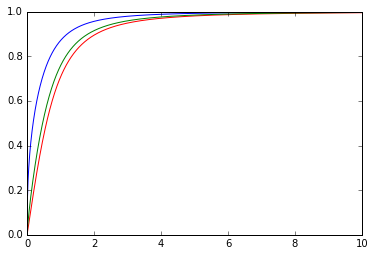

In [5]:
plt.rcParams.update(rcdef)# reset plt.rcParams to default
x=np.linspace(0,10, 1000)
y=g(x)
f=lambda z: (1.0-1.0/(1+z**2))**0.5
h=lambda z: (1.0-1.0/(1+z**2))**0.4
plt.plot(x,y)
plt.plot(x, f(x), 'r')
plt.plot(x, h(x), 'g')

The two color models, RGB and HSV, can be converted from one to another. There is no closed form formula for such a conversion. It is only described algorithmically.
Here is the pseudocode for the conversion [HSV to RGB](http://software.intel.com/sites/products/documentation/hpc/ipp/ippi/ippi_ch6/functn_HSVToRGB.html),
and here for  [RGB to HSV](http://software.intel.com/sites/products/documentation/hpc/ipp/ippi/ippi_ch6/functn_RGBToHSV.html)

The Python module `colorsys`  provides functions for these conversions:

`(r,g,b)=colorsys.hsv_to_rgb(h,s,v)`, 

respectively 

`(h,s,v)= colorsys.rgb_to_hsv(r,g,b)`

Coordinates of the triples (r,g,b), and (h,s,v),
are floating point numbers in $[0,1]$. The hue=h represents the color located at the angular value $2\pi h$ in the color wheel.

For our purposes it is much more useful the function `hsv_to_rgb` from `matplotlib.colors`, that converts a numpy array of shape (m, n, 3), and entries in $[0,1]$, defining a HSV colored image,
to an array of the same shape, interpreted as a RGB  image.

Let us color-encode the points of the rectangular region $D=\{x+iy\in\mathbb{C}\:|\: x\in [-1,4], y\in[-1,3]\}$.

In [6]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H=np.angle(z)/(2*np.pi)+1
    return np.mod(H,1)

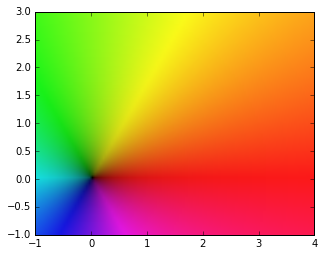

In [7]:
x=np.arange(-1,4, 0.05)
y=np.arange(-1,3, 0.05)
x,y=np.meshgrid(x,y)
z=x+1j*y
H=Hcomplex(z)
V=g(np.absolute(z))
S=0.9*np.ones_like(H)
HSV = np.dstack((H,S,V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-1, 4, -1, 3])

One observes that near origin where the modulus is close to 0, the colors are darker.

### Classical domain coloring method 

Domain Coloring as a method of visualization of complex functions, gained  popularity after  the publication of the [review by F. Farris](http://www.maa.org/visualizing-complex-valued-functions-in-the-plane) for the T Needham' book,
*Visual complex analysis*. 

In order to  visualize a complex function $f$ defined on a  rectangular region $[a,b]\times [c,d]\subset\mathbb{C}$, and taking values in the extended complex plane, $\overline{\mathbb{C}}=\mathbb{C}\cup \{\infty\}$,  one
proceeds as follows:

One defines a narrow grid of this rectangle.

Each  node $z$ of the grid will be colored with the HSV color $(h,s_0, v)$, where $h$ and $v$ encode the argument and  the modulus of $f(z)$, as described above.

The points $z$ for which $|f(z)|=\infty$ are colored with white (white is represented by the triple (r,g,b)=(1,1,1), and its conversion to HSV is (0,0,1)).

If we denote   by  $\mbox{col}:\overline{\mathbb{C}}\to \mbox{HSV}$ the function which encodes the points in the extended complex plane, by a triplet  $(h,s, v)$, then the domain coloring is represented
by the map  $z\mapsto f(z)\mapsto \mbox{col}(f(z))$, i.e. to the point $z$ in the domain one associates the color-code of $f(z)$.


In [8]:
def func_vals(f, re, im,  N): #evaluates the complex function at the nodes of the grid
   #re and im are  tuples, re=(a,b) and im=(c,d), defining the rectangular region
   #N is the number of nodes per unit interval 
    
   l=re[1]-re[0]
   h=im[1]-im[0]
   resL=N*l #horizontal resolution
   resH=N*h#vertical resolution
   x=np.linspace(re[0], re[1],resL)
   y=np.linspace(im[0], im[1], resH)
   x,y=np.meshgrid(x,y)
   z=x+1j*y
   w=f(z)
   return w 

In [9]:
def domaincol_c(w, s):#Classical domain coloring
    #w is the complex array of values f(z)
    #s is the constant saturation
    
    
    indi=np.where(np.isinf(w))#detects the values w=a+ib, with a or b or both =infinity
    indn=np.where(np.isnan(w))#detects nans
  
    H=Hcomplex(w)
    S = s*np.ones_like(H)
    modul=np.absolute(w)
    V= (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0,0,1)=(1,1,1)=white
    H[indi]=0.0 
    S[indi]=0.0  
    V[indi]=1.0
    #hsv_to_rgb(0,0,0.5)=(0.5,0.5, 0.5)=gray  
    H[indn]=0
    S[indn]=0
    V[indn]=0.5
    HSV = np.dstack((H,S,V))
    RGB = hsv_to_rgb(HSV)
    return RGB         

In [10]:
def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], Title='',
                s=0.9, N=200, daxis=None):
    w=func_vals(f, re, im, N)
    domc=color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(Title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])
       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

In order to read-off some properties of a function $f$, encoded in the generated  image, we display alongside the  color-code of the complex plane:

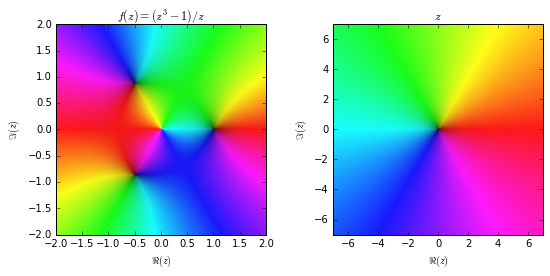

In [11]:
plt.rcParams['figure.figsize'] = 8, 5
ab=[-2,2]
cd=[-2,2]
plt.subplot(1,2,1)
f=lambda z: (z**3-1)/z
plot_domain(domaincol_c, f, re=ab, im= cd, Title='$f(z)=(z^3-1)/z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_c, lambda z:z, re=[-7, 7], im=[-7, 7], Title='$z$', daxis=True)
plt.tight_layout(2)  


Looking at the left image, we observe isochromatic lines. They  form the locus of points in the domain
 that are mapped by $f$  to points   having the same argument (i.e points on the  rays of the same hue in the right image). 

The darker points are mapped by $f$ to points close to the origin.

The function $f$ visualized here has three zeros (the roots of the unity) that are black points, and a pole at $z=0$ (theoretically it is colored white).

This method cannot illustrate however how  varies   the modulus $|f(z)|$, when it is sufficiently greater
than 0. Such an information can be gained from the so called *analytic landscape*, i.e a surface which is the graph
of the modulus $|f(z)|$.

If $|f(z)|$ varies on a too wide range, then one visualizes
the logarithmic analytic landcape, that is the graph of the real function  $\log(|f(z)|)$.

In the following we give the code for generation of the colored analytic landscape. The surface
is colored according to the argument of $f$, using a HSV colormap,
where $H$ is defined as for the domain coloring method, and  $S$ and $V$ are set to be constant.

This method for coloring an analytic landscape  appears to have been proposed by Bernd Thaller and exploited in  his book
[Visual Quantum Mechanics, Springer, 2000](http://vqm.uni-graz.at/).



We are using  [mayavi.mlab](http://docs.enthought.com/mayavi/mayavi/mlab.html) to generate  a colored analytic landscape.

In order to run   the code below, you must
have `wxPython` installed. [Here is the download page](http://www.wxpython.org/download.php).

Otherwise, skip running it.

In [12]:
%gui wx

In [13]:
from mayavi import mlab 

ImportError: No module named 'mayavi'

In [18]:
def HSVcolormap(): #defines colormap for analytic landscape
    argum = np.linspace(-np.pi, np.pi, 256) 
    
    H=argum/(2*np.pi)+1
    H=np.mod(H,1)
    S=np.ones_like(H)
    V=np.ones_like(H)
    
    HSV = np.dstack((H,S,V))
    RGB = hsv_to_rgb(HSV) 
   
    colormap = 255* np.squeeze(RGB) 
    return colormap 


In [19]:
def alandscape(rez, imz, argfz, modfz): #draws the (log)analytic landscape using the HSVcolormap
   
    colormap = HSVcolormap() 
    mesh = mlab.mesh(rez, imz, modfz, scalars=argfz, vmin=-np.pi, vmax=np.pi) 
    
    LUT = mesh.module_manager.scalar_lut_manager.lut.table.to_array() 
    for k in range(3):
        LUT[:,k] = colormap[:,k] 
     
    mesh.module_manager.scalar_lut_manager.lut.table = LUT
    mlab.draw() 
    return mesh 

In [20]:
def evalfun(f, re=[-2,2], im=[-2,2], N=50):# evaluates the log(|f|) at the points of a greed
    nrx=N*(re[1]-re[0])
    nry=N*(im[1]-im[0])
    x=np.linspace(re[0], re[1], nrx)
    y=np.linspace(im[0], im[1], nry)
    
    x,y=np.meshgrid(x,y)
    z=x+1j*y
    w=f(z)
    w[np.isinf(w)]=np.nan
    #m=np.absolute(w)
    m=np.log(np.absolute(w))
    return [x, y, np.angle(w), m]

At this point we are ready to generate the logarithmic analytic landscape of a complex-valued function.

After clicking run in the next cell, one must wait until the `mayavi` scene is displayed. Then, hovering the mouse over it, the surface can be seen  from different points of view. The generated surface is not embedded inline.

In [21]:
mlab.figure(1, bgcolor=(0.95,0.95,0.95))
x,y, theta, m=evalfun(lambda z: (z**3-1)/z)
alandscape(x, y, theta, m) 
mlab.savefig('loglandsc1.jpg' )

Wait a few seconds!!!! The saved image is now displayed:

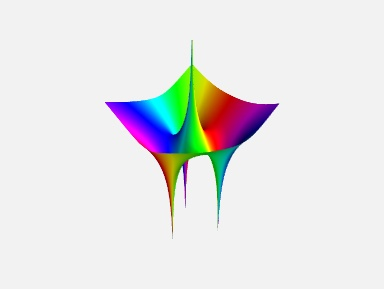

In [22]:
Image(filename='Imags/loglandsc1.jpg')

The same surface seen from the point of view set by

`mlab.view(azimuth=120, elevation=40, distance=15)`:

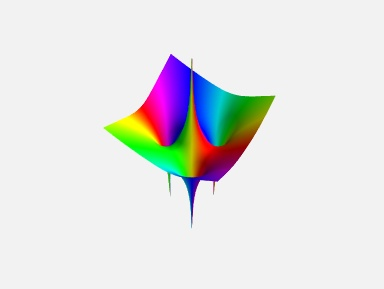

In [23]:
Image('Imags/loglandsc2.jpg')

The log-analytic landscape  of the tangent function:

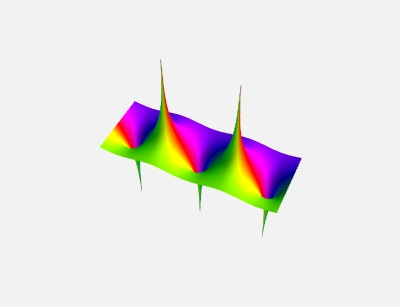

In [24]:
Image(filename='Imags/logmodultan.jpg')

### Domain Coloring with contours lines of constant modulus

In order to point out how the modulus of a complex function changes over domain, 
[Lundmark](http://www.mai.liu.se/~halun/complex/domain_coloring-unicode.html) proposed to add a new feature to  the classical 
domain coloring.

For the color function with values
in the HSV cylinder, this 
amounts to define the brightness at a point $z$ as the fractional part of $\log_2(|f(z)|)$,
$v=\{\log_2(|f(z)|\}$, where $\{x\}=x-[x]$ 
($[x]$ is the integer part of $x$).

Thus when the modulus crosses a value equal to a power of $2$, $|f(z)|=2^k$, $k$ integer, the
brightness has a discontinuity  and gets dark. Around zeros and poles there are rings delimited by dark lines of constant modulus. Within a ring the brightness changes according to the direction of growth of the modulus.
                                                           

In [25]:
%matplotlib inline

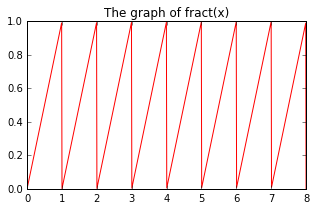

In [14]:
X=np.linspace(0,8,800)
Y=X-np.floor(X)
plt.rcParams['figure.figsize'] = 5, 3 
plt.title('The graph of fract(x)')
plt.plot(X,Y,'r')


The color function implementing this method is defined here:

In [18]:
def domaincol_m(w,  s): #domain coloring with modulus track

    # w the array of values
    #s is the constant Saturation

    H=Hcomplex(w) 
    modulus=np.absolute(w)
    c= np.log(2)
    Logm=np.log(modulus)/c #log base 2
    Logm=np.nan_to_num(Logm)
    Logm = modulus

    V=Logm-np.floor(Logm)
    S = s*np.ones_like(H, float)

    HSV = np.dstack((H,S,V**0.2))# V**0.2>V for V in[0,1];this choice  avoids too dark colors
    RGB=hsv_to_rgb(HSV) 
    return RGB

Let us  illustrate the domains of a few functions colored by this method:

In [19]:
plt.rcParams['figure.figsize'] = 8, 5

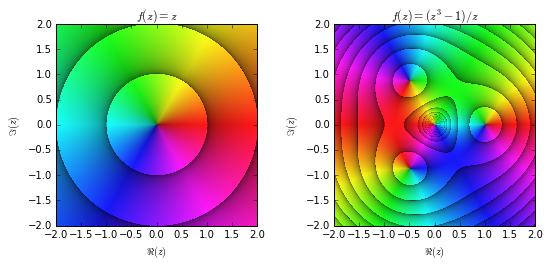

In [20]:
ab=(-2,2)
cd=(-2,2)
plt.subplot(1,2,1)
plot_domain(domaincol_m, lambda z:z,   re=ab, im=cd, Title='$f(z)=z$',  daxis=True)
plt.subplot(1,2,2)
f=lambda z: (z**3-1)/z
plot_domain(domaincol_m, f,   re=ab, im=cd, Title='$f(z)=(z^3-1)/z$',  daxis=True)
plt.tight_layout(2)    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


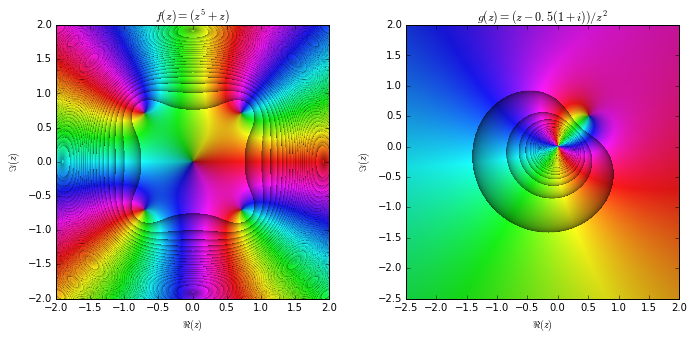

In [21]:
plt.rcParams['figure.figsize'] = 10, 6
plt.subplot(1,2,1)
ab=(-2,2)
cd=(-2,2)
f=lambda z: z**5+z
plot_domain(domaincol_m, f,   re=ab, im=cd, Title='$f(z)=(z^5+z)$', daxis=True)
plt.subplot(1,2,2)
ab=(-2.5,2)
cd=(-2.5,2)
g=lambda z: (z-0.5-0.5*1j)/z**2
plot_domain(domaincol_m, g,   re=ab, im=cd, Title='$g(z)=(z-0.5(1+i))/z^2$', daxis=True)
plt.tight_layout(2)    

In [23]:
plt.rcParams['figure.figsize'] = 12, 6

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


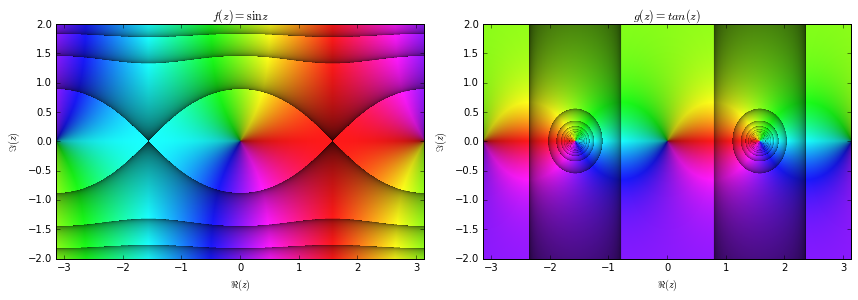

In [24]:
ab=(-np.pi,np.pi)
cd=(-2,2)

plt.subplot(1,2,1)
plot_domain(domaincol_m, np.sin,   re=ab, im=cd, Title='$f(z)=\sin z$', daxis=True)
plt.subplot(1,2,2)
plot_domain(domaincol_m, np.tan,   re=ab, im=cd, Title='$g(z)=tan(z)$', daxis=True)
plt.tight_layout(1)   

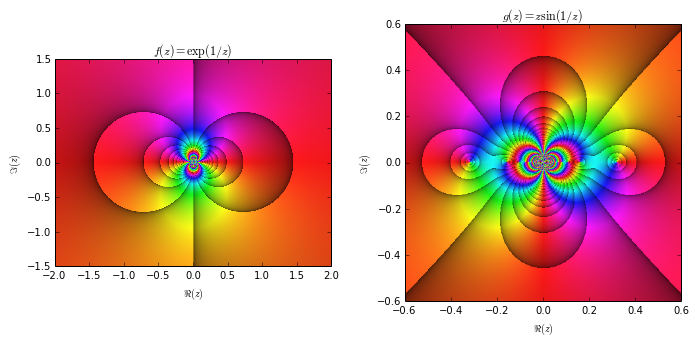

In [33]:
plt.rcParams['figure.figsize'] = 10, 6
plt.subplot(1,2,1)
ab=(-2,2)
cd=(-1.5,1.5)
f=lambda z: np.exp(1.0/z)
plot_domain(domaincol_m,  f,   re=ab, im=cd, Title='$f(z)=\exp(1/z)$', N=350, daxis=True)
plt.subplot(1,2,2)
ab=(-0.6, 0.6)
cd=(-0.6,0.6)
g=lambda z: z*np.sin(1.0/z)
plot_domain(domaincol_m,  g,   re=ab, im=cd, Title='$g(z)=z\sin(1/z)$',N=350, daxis=True)
plt.tight_layout(2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


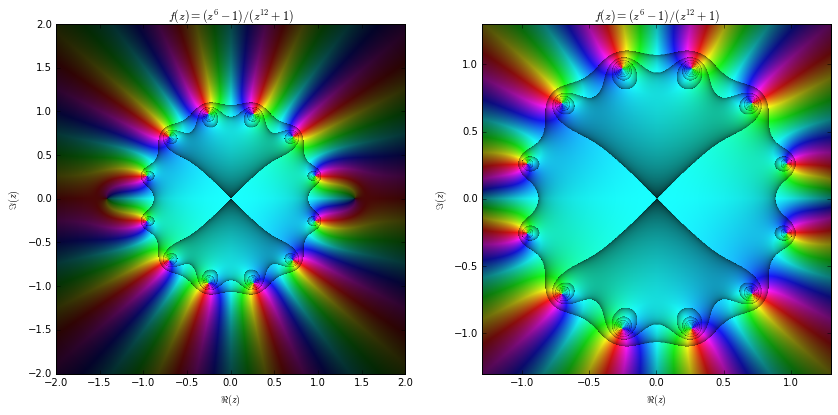

In [29]:
plt.subplot(1,2,1)
ab=(-2,2)
cd=(-2,2)
f=lambda z: (z**2-2)/(z**12+1)
plot_domain(domaincol_m,  f,   re=ab, im=cd, Title='$f(z)=(z^6-1)/(z^{12}+1)$', N=300, daxis=True)
plt.subplot(1,2,2)
ab=(-1.3,1.3)
cd=(-1.3,1.3)
plot_domain(domaincol_m,  f,   re=ab, im=cd, Title='$f(z)=(z^6-1)/(z^{12}+1)$', N=300, daxis=True)
plt.tight_layout(2)

### Phase plot of a complex function with contour lines of the modulus and  the argument

Another method of visualization of a complex function is to draw almost equally spaced lines 
of constant log-modulus and constant argument on a sort of colored domain. It is presented in the
excelent book by E. Wegert, [Visual Complex Functions. An introduction with phase portraits](http://www.springer.com/birkhauser/mathematics/book/978-3-0348-0179-9).


Such a method points out 
whether the plotted  function is conformal or not (a conformal function preserves the angles between  two smooth curves).


A Python implementation of this method is  as follows:

In [35]:
def perfract(x, t, m, M):
    x=x/t
    return m+(M-m)*(x-np.floor(x))

In [36]:
def domaincol_co(w,s):
    H=Hcomplex(w) 
    m=0.7 # brightness is restricted to [0.7,1]; interval suggested by E Wegert
    M=1
    n=15 # n=number of isochromatic lines per cycle 
    isol=perfract(H, 1.0/n, m, M) # isochromatic lines
    modul=np.absolute(w)
    Logm=np.log(modul)
    Logm=np.nan_to_num(Logm) 
    modc=perfract(Logm, 2*np.pi/n, m, M)# lines of constant log-modulus
   
    V=modc*isol 
    S = 0.9*np.ones_like(H, float) 
    HSV = np.dstack((H,S,V))
    RGB = hsv_to_rgb(HSV)
   
    return RGB
    

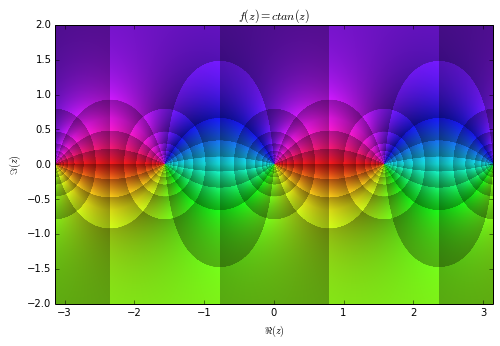

In [37]:
plt.rcParams['figure.figsize'] = 8, 5

ab=(-np.pi, np.pi)
cd=(-2,2)
f=lambda z: 1.0/np.tan(z)
plot_domain(domaincol_co,  f,   re=ab, im=cd, Title='$f(z)=ctan(z)$', N=300, daxis=True)



$f(z)=e^z=e^{x}(\cos y+i\sin y)$ is a conformal function and periodic in $y$. We illustrate
its conformal structure, and alongside $g(z)=z$:

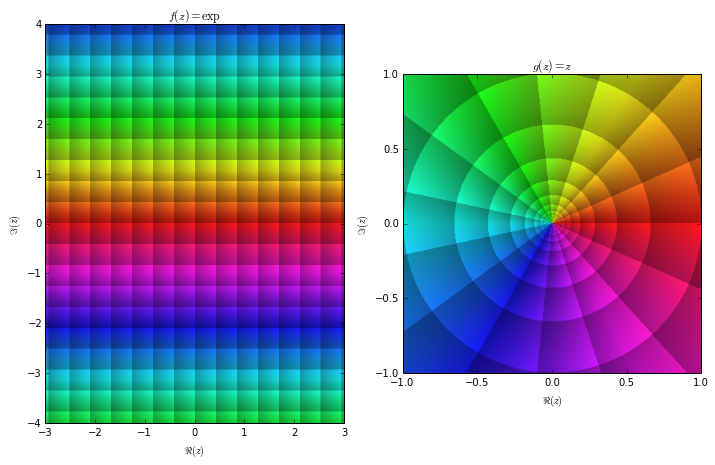

In [38]:
plt.rcParams['figure.figsize'] = 10,8
plt.subplot(1,2,1)
ab=(-3,3)
cd=(-4,4)

plot_domain(domaincol_co,  np.exp,   re=ab, im=cd, Title='$f(z)=\exp$', daxis=True)
plt.subplot(1,2,2)
ab=(-1,1)
cd=(-1,1)
g=lambda z:z
plot_domain(domaincol_co,  g,   re=ab, im=cd, Title='$g(z)=z$',  daxis=True)

plt.tight_layout(1)

Now we generate the image of the same function with all three methods.

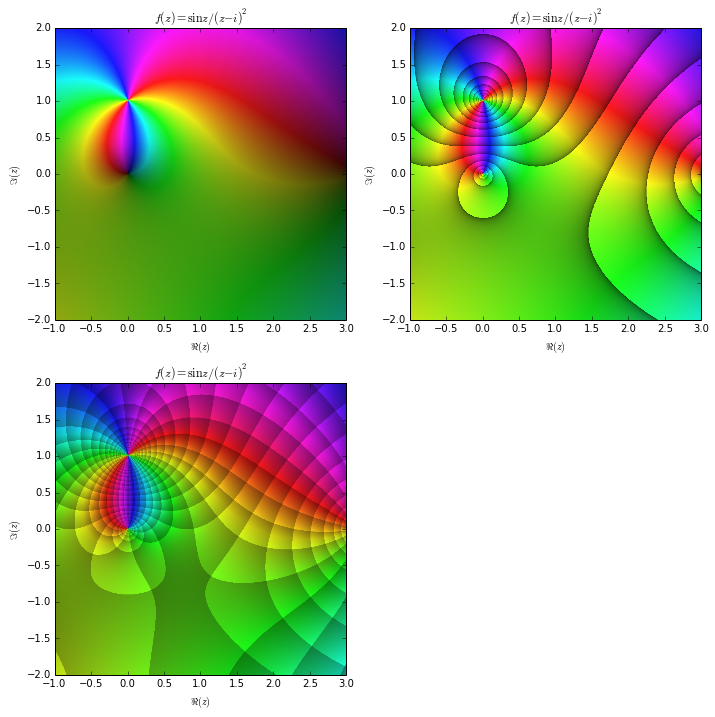

In [39]:
plt.rcParams['figure.figsize'] = 10,10

ab=(-1,3)
cd=(-2,2)
f=lambda z: np.sin(z)/(z-1j)**2
plt.subplot(2,2,1)
plot_domain(domaincol_c,  f,   re=ab, im=cd, Title='$f(z)=\sin z/(z-i)^2$', daxis=True)
plt.subplot(2,2,2)
plot_domain(domaincol_m,  f,   re=ab, im=cd, Title='$f(z)=\sin z/(z-i)^2$', daxis=True)
plt.subplot(2,2,3)
plot_domain(domaincol_co,  f,   re=ab, im=cd, Title='$f(z)=\sin z/(z-i)^2$', daxis=True)
plt.tight_layout(1)

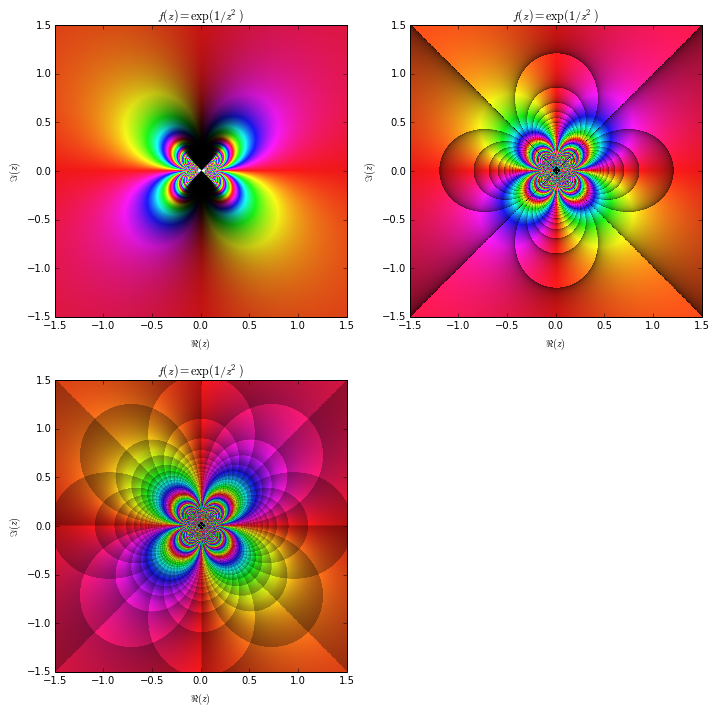

In [41]:
plt.rcParams['figure.figsize'] = 10,10

ab=(-1.5,1.5)
cd=(-1.5,1.5)
f=lambda z: np.exp(1.0/z**2)
plt.subplot(2,2,1)
plot_domain(domaincol_c,  f,   re=ab, im=cd, Title='$f(z)=\exp(1/z^2)$', N=350, daxis=True)
plt.subplot(2,2,2)
plot_domain(domaincol_m,  f,   re=ab, im=cd, Title='$f(z)=\exp(1/z^2)$', N=350, daxis=True)
plt.subplot(2,2,3)
plot_domain(domaincol_co,  f,   re=ab, im=cd, Title='$f(z)=\exp(1/z^2)$',N=350, daxis=True)
plt.tight_layout(1)

We notice that the classical domain coloring illustrates a property of the function $f(z)=\exp(1/z^2)$
that is not revealed by the other two methods. Namely it is zero on the imaginary axis, and infinity
on the real one, in a neighbourhood of $0$.

A discussion on the complementarity of the three methods of visualization of a complex function,
as well as on
the properties of the functions that can be read-off from their visual representation will be presented in the next
IPython Notebook.

Finally, we note that the Python [mpmath package](https://code.google.com/p/mpmath/) provides  the function `mpmath.cplot` that implements  the classical method  of  domain coloring,
 using the HSL color model.  This implementation is very slow because the function that colors the nodes in the grid is not vectorized. It works on each node, individually.

Emilia Petrisor

In [30]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: './styles/custom.css'